In [2]:
1+4

5

In [3]:
import re
text_string="西南石油大学是全国第二所石油本科院校。今天的西南石油大学成都校区是2005年从南充搬迁过来的。"
p_string = text_string.split('。')

In [9]:
print(p_string[1])

今天的西南石油大学成都校区是2005年从南充搬迁过来的


In [12]:
regex="西南石油大学"
for line in p_string:
    if re.search(regex,line) is not None:
        print (line)

西南石油大学是全国第二所石油本科院校
今天的西南石油大学成都校区是2005年从南充搬迁过来的


In [13]:
## 上面的例子：实现了关键词从语句中的检索功能。
## 步骤如下：
## 1.对文本进行切分处理，依据标点符号句号，当然也可以是其它形式
## 2.通过循环在切分后的每句话中查找“西南石油大学”所包含的句子

In [14]:
## 正则表达式中的一些关键字符
##  ^ $ . 三个的含义
regex2 = '^西南石油大学'
for line in p_string:
    if re.search(regex2,line) is not None:
        print(line)

西南石油大学是全国第二所石油本科院校


In [15]:
## \ 反斜杠的转义问题
## \\\\ 四个反斜杠实现
## r“\\” 实现 匹配反斜杠

#  [0-9]{3} 表现前面的中括号重复3次

In [26]:
import numpy as np
#define a vector
vector = np.array({1,2,3,4})
matrix = np.array([[a for a in range(4)], ['tim','qq','tencent','wechat']])
print(vector)
print(matrix)

a = np.arange(15).reshape(3,5)
print(a.shape)

{1, 2, 3, 4}
[['0' '1' '2' '3']
 ['tim' 'qq' 'tencent' 'wechat']]
(3, 5)


In [30]:
m = np. arange(5,50,5).reshape(3,3)
print(m)

[[ 5 10 15]
 [20 25 30]
 [35 40 45]]


In [32]:
import pprint
pprint.pprint(m)

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])


In [35]:
print(m[:,1][1])

25


In [38]:
# 数组的比较
mdiff = (m == 25)
print(mdiff)

[[False False False]
 [False  True False]
 [False False False]]


In [222]:
import jieba
# define user diction 
jieba.load_userdict('D:\\NLP\\userdict.txt')

sent = "西南石油大学是新中国成立后的第二所石油本科院校"
seg_list= jieba.cut(sent)
print('default model:', '/' .join(seg_list))
print(list(seg_list))

default model: 西南/石油大学/是/新/中国/成立/后/的/第二所/石油/本科/院校
[]


In [223]:
# 定义读取文本内容的函数
def get_content(path):
    with open(path, 'r', encoding='gbk', errors='ignore') as f:
        content =''
        for l in f :
            l = l.strip()
            content += l
    return content

In [224]:
content = get_content('D:\\NLP\\abstract.txt')

In [225]:
print(content)

乡村文化是我们的精神原乡。 千百年来，日出而作、日落而息的广大农民在乡村辛勤劳作实践中涵育、培植和积累了诸多优秀文化因子。可以说，乡村文化既是中华优秀传统文化的起源，也是培植民族优良品质的沃土，更是广大农民的情感皈依和精神故园。乡村文化是乡村振兴的历史源头。乡村文化蕴含的风俗、礼仪、饮食、建筑、服饰等精神要素，构成农村独具魅力的人文风景，从一个侧面反映了全体国民的理想追求、处事原则、生活憧憬以及对社会、对人生的理性考量和认知模式等，在我国基脉甚广、源远流长。它产生并服务于农耕社会，与当下以城市为中心的大众文化迥然有别。对乡村文化的尊重与延续，既是对传统文化历史源头的守护和对文化基因的传承，也是对文化资源的开发利用和对文化“软实力”的锻铸塑造。凡是流传至今的乡村文化，大都饱经岁月淘洗、历经铅华磨砺，是乡村振兴的源头活水。乡村文化是一个开放系统和开阔空间，对新时期各种形式的乡村文化，无论是以物质形态呈现的亭台楼阁、路桥围屋、民宅民居，还是以非物质形态呈现的歌舞说唱、乡规民约、家风家训、民风民俗、传统工艺、戏曲庙会等，都是应充分汲取的民族文化精华。我们应根据新时期农民群众的精神需求，对乡村文化资源进行合理开发和有效保护，对乡村文化各种形态样式进行大力传承和积极创新，使乡村文化在涵养乡风文明、培育新时代村民实践中发挥应有作用。构建文化精神建设的新形态。


In [226]:
# pattern =   re.compile(u'|\; |\"|\"')
# if re.search(pattern,content) is not None:
#     print('OK')
# else:
#     print('not ok')
# replace character in content
def rep_char (content):
    pattern =  re.compile(u'\。| \；|\：|\;|\, |\: |\“|\”|\，|\、| ')
    content = re.sub(pattern,' ',content)
    return content.strip()

# 定义统计词频的函数
def get_tf(words, top_TF=10):
    tf_dic={ }
    for w in words:
        tf_dic[w] = tf_dic.get(w,0)+1
    return sorted(tf_dic.items(), key=lambda x:x[1],reverse=True)[:top_TF]

In [232]:
content = rep_char(content)

split_words = list(jieba.cut(content))
# define stop_list
stop_list =['的','用','中',' ','这','在','从','也','本','等','对','是','和','了','既','我们']
jieba.suggest_freq('新形态',True)
split_words = [x for x in split_words if x not in stop_list]


pprint.pprint(get_tf(split_words,10))

[('文化', 19),
 ('乡村', 14),
 ('精神', 5),
 ('农民', 3),
 ('形态', 3),
 ('广大', 2),
 ('实践', 2),
 ('培植', 2),
 ('优秀', 2),
 ('传统', 2)]


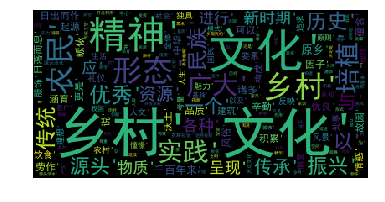

In [242]:
# display wordcloud
from wordcloud import WordCloud
wc = WordCloud(font_path='C:/Windows/Fonts/simhei.ttf',max_words=200)
wc.generate(str(split_words))

import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')
plt.show()